In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
# Load the data
data = pd.read_csv('microchips.csv', header=None, names=['Test1', 'Test2', 'Class'])

# Separate the data into OK and fail groups
ok_data = data[data['Class'] == 1]
fail_data = data[data['Class'] == 0]

# Define the feature matrix X and target vector y
X = data[['Test1', 'Test2']].values
y = data['Class'].values

# Define the test points
test_points = np.array([[-0.3, 1.0], [-0.5, -0.1], [0.6, 0.0]])

# Define the values of k to use
k_values = [1, 3, 5, 7]

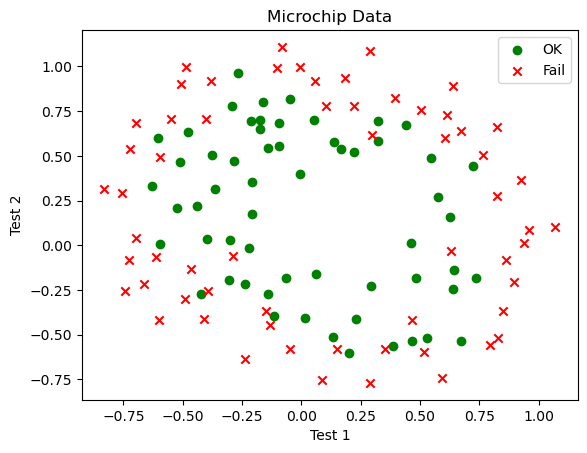

In [3]:
plt.scatter(ok_data['Test1'], ok_data['Test2'], marker='o', color='green', label='OK')
plt.scatter(fail_data['Test1'], fail_data['Test2'], marker='x', color='red', label='Fail')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.title('Microchip Data')
plt.legend()
plt.show()

In [4]:
# Create the feature matrix X and target vector y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Define the test points
test_points = [[-0.3, 1.0], [-0.5, -0.1], [0.6, 0.0]]

# Define the values of k to use
k_values = [1, 3, 5, 7]

# Loop over the values of k and make predictions for each test point
for k in k_values:
    print(f'k = {k}')
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    for i, point in enumerate(test_points):
        if model.predict([point]) == 0:
            print(f'chip{i+1}: {point} ==> Fail')
        else:
            print(f'chip{i+1}: {point} ==> OK')

k = 1
chip1: [-0.3, 1.0] ==> OK
chip2: [-0.5, -0.1] ==> Fail
chip3: [0.6, 0.0] ==> Fail
k = 3
chip1: [-0.3, 1.0] ==> Fail
chip2: [-0.5, -0.1] ==> Fail
chip3: [0.6, 0.0] ==> OK
k = 5
chip1: [-0.3, 1.0] ==> Fail
chip2: [-0.5, -0.1] ==> OK
chip3: [0.6, 0.0] ==> OK
k = 7
chip1: [-0.3, 1.0] ==> Fail
chip2: [-0.5, -0.1] ==> Fail
chip3: [0.6, 0.0] ==> OK


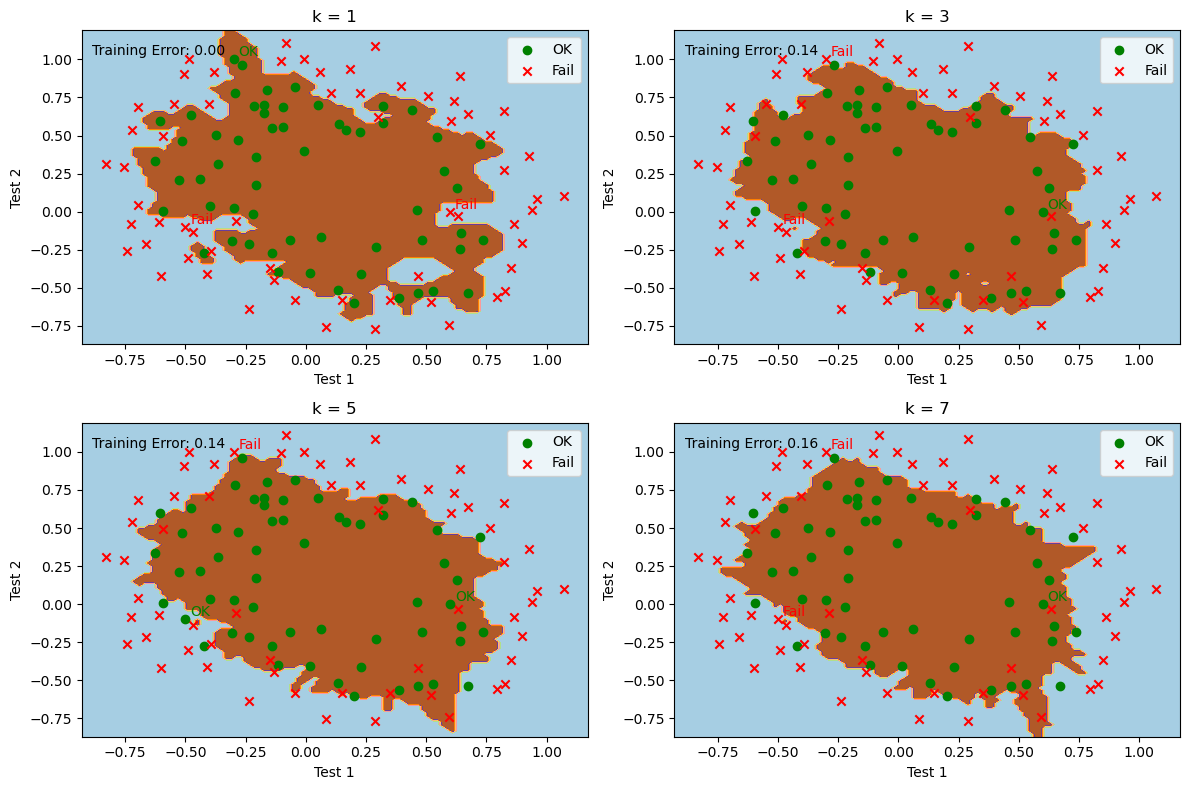

In [5]:
# Create a 2x2 plot to show the decision boundaries and training errors
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Loop over the values of k and make predictions for each test point
for i, ax in enumerate(axes.flat):
    k = k_values[i]
    
    # Train a k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    # Plot the decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    # Plot the training data
    ax.scatter(ok_data['Test1'], ok_data['Test2'], marker='o', color='green', label='OK')
    ax.scatter(fail_data['Test1'], fail_data['Test2'], marker='x', color='red', label='Fail')
    ax.set_xlabel('Test 1')
    ax.set_ylabel('Test 2')
    ax.set_title(f'k = {k}')
    ax.legend()
    
    # Make predictions for the test points and compute training error
    for j, point in enumerate(test_points):
        prediction = knn.predict([point])
        if prediction == 0:
            ax.scatter(point[0], point[1], marker='x', color='red')
            ax.annotate('Fail', (point[0] + 0.02, point[1] + 0.02), color='red')
        else:
            ax.scatter(point[0], point[1], marker='o', color='green')
            ax.annotate('OK', (point[0] + 0.02, point[1] + 0.02), color='green')
    error = 1 - knn.score(X, y)
    ax.annotate(f'Training Error: {error:.2f}', xy=(0.02, 0.92), xycoords='axes fraction')
    
plt.tight_layout()
plt.show()